In [3]:
import xarray as xr
import cfgrib
import cartopy.crs as ccrs
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt

# Open dataset

In [1]:
rootpath='/projekt2/hochatm/akuchar/SSW_2021/' # change to /gemeinsam_tmp/SSW_2021/

## ICON

In [34]:
client = Client(LocalCluster(host='192.168.154.3')) # change to ora's IP adress: 192.168.135.33

/projekt2/hochatm/akuchar/.conda/envs/myenv/lib/python3.7/site-packages/distributed/node.py:161: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44621 instead
  f"Port {expected} is already in use.\n"


In [35]:
filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
infiles = f'{rootpath}dwd/analysis_new/igar??????????'
ds = xr.open_mfdataset(
    infiles,
    engine='cfgrib',
    combine='nested',
    concat_dim = 'time',
    parallel = True,
    backend_kwargs={'filter_by_keys': filter_by_keys}
)

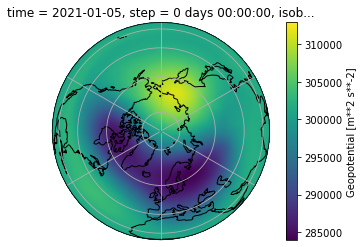

In [10]:
p = ds['z'].sel(
    isobaricInhPa=10,
    time = '2021-01-05T00'
).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(0, 90)), 
    transform=ccrs.PlateCarree(),
    #robust = True
)
p.axes.set_global()
p.axes.coastlines()
p.axes.gridlines()

## ERA5

In [36]:
infiles = f'{rootpath}ERA5/*'
ds_era = xr.open_mfdataset(
    infiles,
    engine='cfgrib',
    combine='nested',
    concat_dim = 'time',
    parallel = True,
)

Can't create file '/projekt2/hochatm/akuchar/SSW_2021/ERA5/adaptor.mars.internal-1641922850.4481783-23972-23-a86bc123-075a-40df-9db0-d6a6c6361ef1.grib.923a8.idx.923a8.idx'
Traceback (most recent call last):
  File "/projekt2/hochatm/akuchar/.conda/envs/myenv/lib/python3.7/site-packages/cfgrib/messages.py", line 239, in __iter__
    yield self.message_from_file(file, errors=self.errors)
  File "/projekt2/hochatm/akuchar/.conda/envs/myenv/lib/python3.7/site-packages/cfgrib/messages.py", line 255, in message_from_file
    return self.message_class.from_file(file, offset, **kwargs)
  File "/projekt2/hochatm/akuchar/.conda/envs/myenv/lib/python3.7/site-packages/cfgrib/messages.py", line 102, in from_file
    raise EOFError("End of file: %r" % file)
EOFError: End of file: <_io.BufferedReader name='/projekt2/hochatm/akuchar/SSW_2021/ERA5/adaptor.mars.internal-1641922850.4481783-23972-23-a86bc123-075a-40df-9db0-d6a6c6361ef1.grib.923a8.idx'>

During handling of the above exception, another exce

EOFError: No valid message found in file: '/projekt2/hochatm/akuchar/SSW_2021/ERA5/adaptor.mars.internal-1641922850.4481783-23972-23-a86bc123-075a-40df-9db0-d6a6c6361ef1.grib.923a8.idx'

## GEOS-FP

In [ ]:
infiles = f'{rootpath}/geos-fp/geos5_subset*.nc'
ds_geos = xr.open_mfdataset(
    infiles,
    combine='nested',
    concat_dim = 'time',
    parallel = True,
)

# Comparison at 10 hPa

## Zonal average

In [29]:
ds_geos['u'].sel(
    lev=10,
    lat = 60,
)

<xarray.DataArray 'u' (time: 34, lon: 1152)>
dask.array<getitem, shape=(34, 1152), dtype=float32, chunksize=(1, 1152), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-12-15 ... 2020-12-23T06:00:00
    lev      float64 10.0
    lat      float64 60.0
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Attributes:
    long_name:  eastward_wind

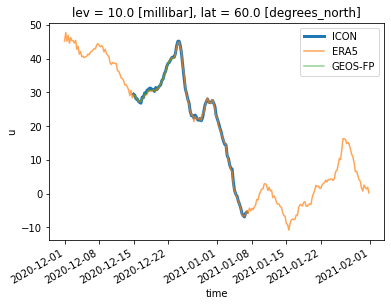

In [ ]:
p = ds['u'].sel(
    isobaricInhPa=10,
    latitude = 60,
    method = 'nearest'
).mean('longitude').plot(x = 'time', label = 'ICON', lw = 3)
ax = p[0].axes
ds_era['u'].sel(
    isobaricInhPa=10,
    latitude = 60,
    method = 'nearest'
).mean('longitude').plot(x = 'time', ax = ax, label = 'ERA5', alpha = 0.7)
ds_geos['u'].sel(
    lev=10,
    lat = 60,
).mean('lon').plot(x = 'time', ax = ax, label = 'GEOS-FP', alpha = 0.5)
ax.legend()

## Zonal std

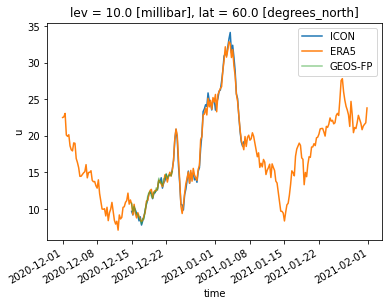

In [33]:
p = ds['u'].sel(
    isobaricInhPa=10,
    latitude = 60,
    method = 'nearest'
).std('longitude').plot(x = 'time', label = 'ICON')
ax = p[0].axes
ds_era['u'].sel(
    isobaricInhPa=10,
    latitude = 60,
    method = 'nearest'
).std('longitude').plot(x = 'time', ax = ax, label = 'ERA5')
ds_geos['u'].sel(
    lev=10,
    lat = 60,
).std('lon').plot(x = 'time', ax = ax, label = 'GEOS-FP', alpha = 0.5)
ax.legend()